## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

## Importing Dataset

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [3]:
print("X-Train", x_train.shape, "<>", "Y-Train", y_train.shape)
print("X-Test", x_test.shape, "<>", "Y-Test",  y_test.shape)

X-Train (60000, 28, 28) <> Y-Train (60000,)
X-Test (10000, 28, 28) <> Y-Test (10000,)


## Visualization 

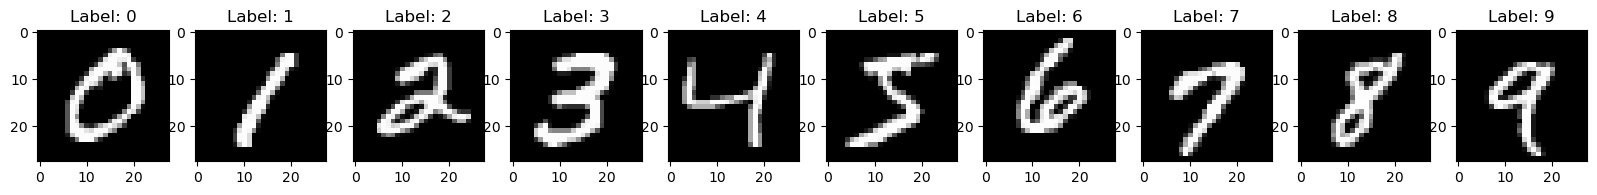

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize = (20, 20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title(f'Label: {i}')
    

In [5]:
for i in range(10):
    print(y_train[i])

print("-----")
    
for i in range(10):
    print(y_test[i])

5
0
4
1
9
2
1
3
1
4
-----
7
2
1
0
4
1
4
9
5
9


## Converting numerical data using OneHotEncoding

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
for i in range(10):
    print(y_train[i])

print("-----")
    
for i in range(10):
    print(y_test[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
-----
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Preparing the data

In [8]:
# Normalizing the data
x_train = x_train/255
x_test = x_test/255

In [9]:
# Reshaping the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [10]:
print(x_train.shape)

(60000, 784)


In [11]:
print(x_test.shape)

(10000, 784)


## Creating the Model

In [12]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Training

In [13]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 8ms/step - loss: 0.5928 - accuracy: 0.8293
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2308 - accuracy: 0.9334
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1690 - accuracy: 0.9510
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1369 - accuracy: 0.9605
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1114 - accuracy: 0.9676
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0948 - accuracy: 0.9718
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0798 - accuracy: 0.9765
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0697 - accuracy: 0.9790
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0608 - accuracy: 0.9820
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0539 - accuracy: 0.9833

## Evaluate

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9753
Test Loss: 0.07859595865011215, Test Accuracy: 0.9753000140190125


## Prediction

In [15]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 1ms/step
[[8.3237614e-07 3.8879480e-06 1.0432265e-04 ... 9.9941373e-01
  1.5986218e-06 4.0738505e-06]
 [2.1416920e-08 1.3879940e-04 9.9984717e-01 ... 4.7629003e-09
  3.1201523e-08 1.6698214e-10]
 [1.4214103e-06 9.9908912e-01 1.5183017e-04 ... 3.3544149e-04
  2.3911217e-04 1.9339504e-05]
 ...
 [1.3558649e-10 5.0521450e-08 1.3732493e-08 ... 1.3604729e-05
  1.8759570e-08 3.3459793e-07]
 [6.9416977e-08 2.1815323e-09 8.8995936e-11 ... 7.4225763e-09
  7.6560485e-05 2.4310285e-07]
 [1.3000965e-07 1.5869674e-09 6.8678844e-08 ... 1.3443946e-11
  6.5612355e-08 5.4816599e-11]]
[7 2 1 ... 4 5 6]


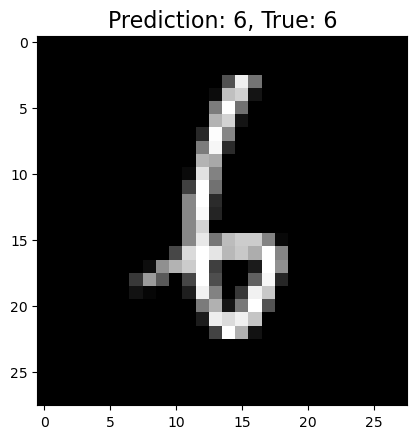

In [16]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Prediction: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap = 'gray')

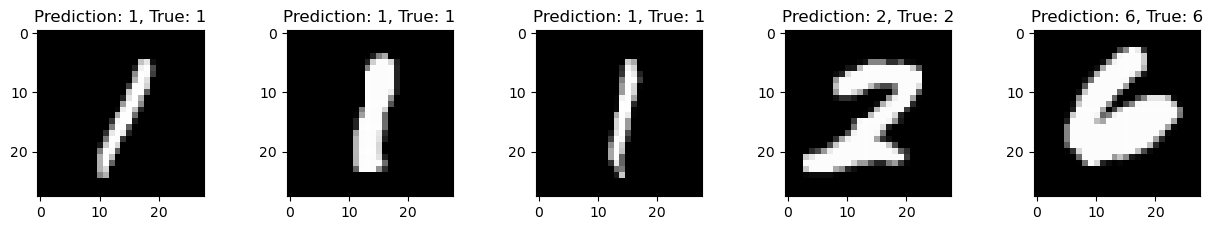

In [17]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))  

for i in range(5):
    random_idx = np.random.choice(len(x_test))
    x_sample = x_test[random_idx]
    y_true = np.argmax(y_test, axis=1)
    y_sample_true = y_true[random_idx]
    y_sample_pred_class = y_pred_classes[random_idx]

    ax = axs[i]
    ax.set_title("Prediction: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=12)
    ax.imshow(x_sample.reshape(28, 28), cmap='gray')

plt.subplots_adjust(wspace=0.5) 
plt.show()


## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

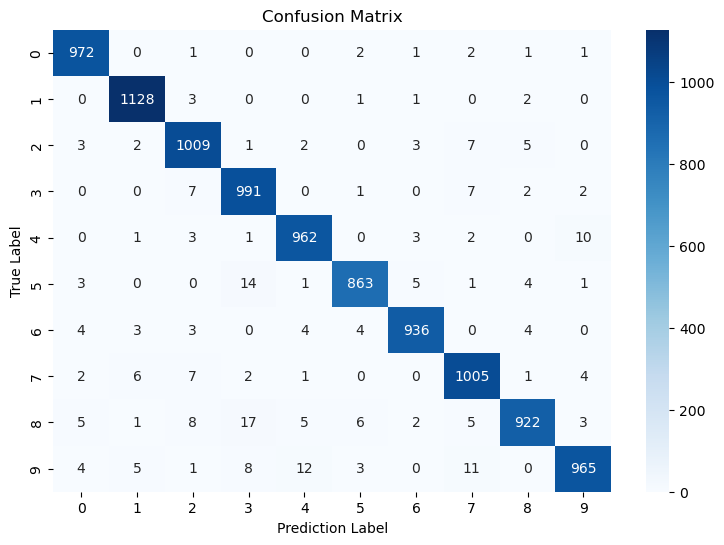

In [23]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Prediction Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')